In [66]:
import numpy as np
import matplotlib.pyplot as plt
from alive_progress import alive_bar


In [67]:
#Probabilistic Cellular Automata
Lb= 0.9 #probability of choosing the local rule
rule =18
def define_f2(x):
    return np.binary_repr(x, width=8)
bin_rule = define_f2(rule) 

def f_cell(xl,x,xr):
    """ Chose the local rule with probability Lb and the null rule with probability 1-Lb"""
    if np.random.rand()>Lb:
        return 0
    else:
        pos=xl*4+x*2+xr
        return bin_rule[7-pos]

def step_conf(x):
    """It gives the next configuration of the CA
    Args:
        x (_type_): configuration array of the CA at fixed time
        rule (_type_): local rule of the CA
    Returns:
        _type_: _description_
    """
    y=np.zeros(x.shape).astype(int)
    for i in range(0,len(x)):
        if i==0:
            y[i]=f_cell(x[-1],x[i],x[i+1])
        elif i==len(x)-1:
            y[i]=f_cell(x[i-1],x[i],x[0])
        else:
            y[i]=f_cell(x[i-1],x[i],x[i+1])
    return y

def plot_conf(x):
    """Plot the configuration of the CA
    Args:
        x (_type_): configuration array of the CA at fixed time
    Returns:
        _type_: _description_
    """
    plt.figure(figsize=(10,10))
    plt.show()

def density(x):
    """It gives the density of the CA
    Args:
        x (_type_): configuration array of the CA at fixed time
    Returns:
        _type_: _description_
    """
    return np.sum(x)/len(x)


Initial [0 0 1 ... 0 1 1]
|████████████████████████████████████████| 100/100 [100%] in 12.8s (7.79/s)                                             
Density 0.21734
Final   [0 0 0 ... 0 0 0]


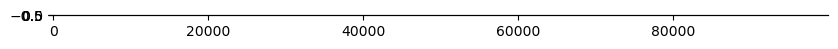

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-06 s

Total time: 0.323683 s
File: /var/folders/6g/jfjxp2713gzcmhbs0t_zwsn00000gp/T/ipykernel_77172/83473710.py
Function: step_conf at line 16

Line #      Hits         Time  Per Hit   % Time  Line Contents
    16                                           def step_conf(x):
    17                                               """It gives the next configuration of the CA
    18                                               Args:
    19                                                   x (_type_): configuration array of the CA at fixed time
    20                                                   rule (_type_): local rule of the CA
    21                                               Returns:
    22                                                   _type_: _description_
    23                                               """
    24         1        111.0    111.0      0.0      y=np.zeros(x.shape).astype(int)
    25    100001      34274.0      0.3     10.6      for i in ran

In [69]:
#Starting random configuration 

n=10e4
Time = 100
x=np.random.randint(0,2,int(n))
print("Initial", x)
with alive_bar(Time,force_tty=True) as bar:
    for t in range(Time):
        x=step_conf(x)
        bar()
print("Density",density(x))
print("Final  ", x)
%load_ext line_profiler
%lprun -f step_conf step_conf(x)



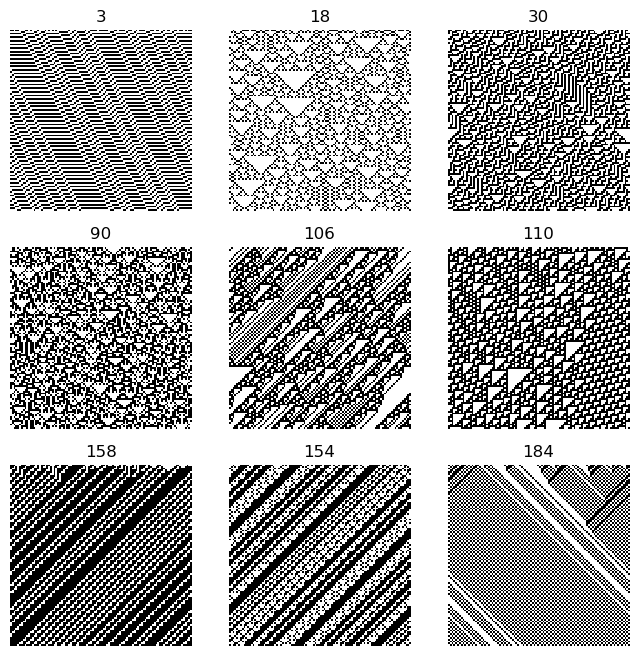